# Data Processing for Soccer Results Data

In [16]:
# import libraries
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# load data
df = pd.read_csv('results.csv')

# preprocessing
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df = df[df['year'] != 2024]

# show data
print(df.shape)
df.head()

(46791, 10)


,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,year
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,1872
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,1873
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,1874
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,1875
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,1876


,year,number_of_games
0,1872,1
1,1873,1
2,1874,1
3,1875,1
4,1876,2
...,...,...
147,2019,1147
148,2020,347
149,2021,1115
150,2022,969


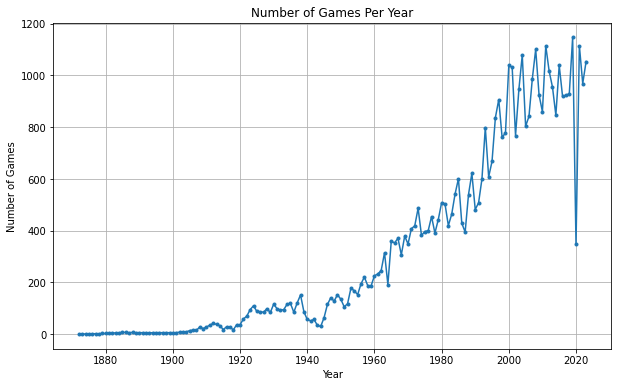

In [20]:
# count of games per year
games_per_year = df.groupby('year').size().reset_index(name='number_of_games')
display(games_per_year)

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(games_per_year['year'], games_per_year['number_of_games'], marker='.', linestyle='-')
plt.title('Number of Games Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games')
plt.grid(True)
plt.show()

,year,average_goals_per_game
0,1872,0.000000
1,1873,6.000000
2,1874,3.000000
3,1875,4.000000
4,1876,3.500000
...,...,...
147,2019,2.889276
148,2020,2.440922
149,2021,2.758744
150,2022,2.514964


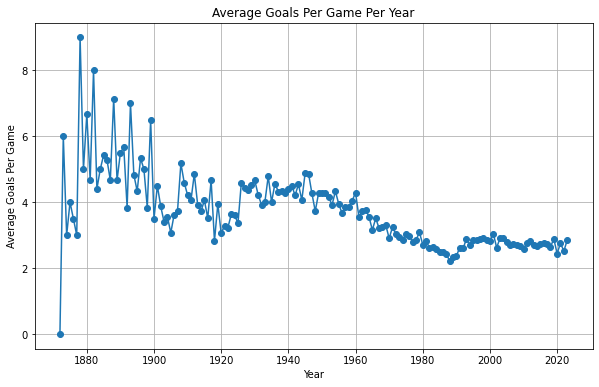

In [19]:
# Calculate total goals per game
df['total_goals'] = df['home_score'] + df['away_score']

# Calculate average goals per game per year
average_goals_per_year = df.groupby('year')['total_goals'].mean().reset_index(name='average_goals_per_game')

# Display the dataframe with average goals per game per year
display(average_goals_per_year)

# Create a line chart for average goals per game per year
plt.figure(figsize=(10, 6))
plt.plot(average_goals_per_year['year'], average_goals_per_year['average_goals_per_game'], marker='o', linestyle='-')
plt.title('Average Goals Per Game Per Year')
plt.xlabel('Year')
plt.ylabel('Average Goals Per Game')
plt.grid(True)
plt.show()

,year,unique_teams,number_of_unique_teams
0,1872,"[Scotland, England]",2
1,1873,"[England, Scotland]",2
2,1874,"[Scotland, England]",2
3,1875,"[England, Scotland]",2
4,1876,"[Scotland, England, Wales]",3
...,...,...,...
147,2019,"[Oman, United Arab Emirates, Thailand, Austral...",252
148,2020,"[Barbados, Moldova, Kosovo, Canada, El Salvado...",140
149,2021,"[United Arab Emirates, Kuwait, Dominican Repub...",196
150,2022,"[Thailand, Gabon, Sudan, Rwanda, Mauritania, A...",221


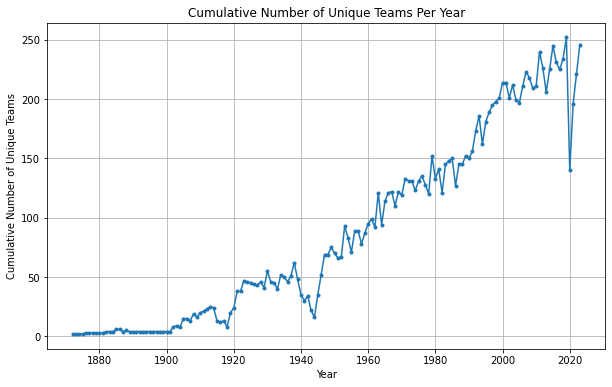

In [25]:
# unique teams
unique_teams_per_year = df.groupby('year').apply(lambda x: pd.unique(x[['home_team', 'away_team']].values.ravel('K'))).reset_index(name='unique_teams')
unique_teams_per_year['number_of_unique_teams'] = unique_teams_per_year['unique_teams'].apply(len)
display(unique_teams_per_year)

# Create a line chart for the cumulative number of unique teams per year
plt.figure(figsize=(10, 6))
plt.plot(unique_teams_per_year['year'], unique_teams_per_year['number_of_unique_teams'], marker='.', linestyle='-')
plt.title('Cumulative Number of Unique Teams Per Year')
plt.xlabel('Year')
plt.ylabel('Cumulative Number of Unique Teams')
plt.grid(True)
plt.show()

In [28]:
# Cummulative goals per team by year
# Calculate total goals scored by each team each year
home_goals = df.groupby(['year', 'home_team'])['home_score'].sum().reset_index()
home_goals.columns = ['year', 'team', 'goals']
away_goals = df.groupby(['year', 'away_team'])['away_score'].sum().reset_index()
away_goals.columns = ['year', 'team', 'goals']

# Combine home and away goals
total_goals = pd.concat([home_goals, away_goals])

# Calculate cumulative goals scored by each nation each year
total_goals['cumulative_goals'] = total_goals.groupby('team')['goals'].cumsum()

# Aggregate cumulative goals by year
cumulative_goals_by_year = total_goals.groupby(['year', 'team'])['cumulative_goals'].max().reset_index()

# Pivot the data to have years as columns and teams as rows
pivot_df = cumulative_goals_by_year.pivot(index='team', columns='year', values='cumulative_goals').fillna(0)

# Convert the pivoted dataframe to a list of dictionaries for JSON export
data_json = pivot_df.reset_index().to_dict(orient='records')

In [29]:
data_json

[{'team': 'Abkhazia',
  1872: 0.0,
  1873: 0.0,
  1874: 0.0,
  1875: 0.0,
  1876: 0.0,
  1877: 0.0,
  1878: 0.0,
  1879: 0.0,
  1880: 0.0,
  1881: 0.0,
  1882: 0.0,
  1883: 0.0,
  1884: 0.0,
  1885: 0.0,
  1886: 0.0,
  1887: 0.0,
  1888: 0.0,
  1889: 0.0,
  1890: 0.0,
  1891: 0.0,
  1892: 0.0,
  1893: 0.0,
  1894: 0.0,
  1895: 0.0,
  1896: 0.0,
  1897: 0.0,
  1898: 0.0,
  1899: 0.0,
  1900: 0.0,
  1901: 0.0,
  1902: 0.0,
  1903: 0.0,
  1904: 0.0,
  1905: 0.0,
  1906: 0.0,
  1907: 0.0,
  1908: 0.0,
  1909: 0.0,
  1910: 0.0,
  1911: 0.0,
  1912: 0.0,
  1913: 0.0,
  1914: 0.0,
  1915: 0.0,
  1916: 0.0,
  1917: 0.0,
  1918: 0.0,
  1919: 0.0,
  1920: 0.0,
  1921: 0.0,
  1922: 0.0,
  1923: 0.0,
  1924: 0.0,
  1925: 0.0,
  1926: 0.0,
  1927: 0.0,
  1928: 0.0,
  1929: 0.0,
  1930: 0.0,
  1931: 0.0,
  1932: 0.0,
  1933: 0.0,
  1934: 0.0,
  1935: 0.0,
  1936: 0.0,
  1937: 0.0,
  1938: 0.0,
  1939: 0.0,
  1940: 0.0,
  1941: 0.0,
  1942: 0.0,
  1943: 0.0,
  1944: 0.0,
  1945: 0.0,
  1946: 0.0,
  1